In [1]:
import pandas as pd
import numpy as np

In [2]:
DATA_PATH = "D:/RK/Marwadi University/Sem-7/Project/base"

In [3]:
import os
os.chdir(DATA_PATH)

In [4]:
train_data = pd.read_csv('train_data.csv',sep='|')
test_data = pd.read_csv('test_data.csv', sep='|')
val_data = pd.read_csv('val_data.csv', sep='|')
raw_data = pd.read_csv('raw_data.csv', sep='|')

In [5]:
train_data.columns

Index(['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS',
       'patient_id', 'SepsisLabel'],
      dtype='object')

In [6]:
X_features = ['HR', 'O2Sat', 'Temp', 'SBP', 'MAP', 'DBP', 'Resp', 'EtCO2',
       'BaseExcess', 'HCO3', 'FiO2', 'pH', 'PaCO2', 'SaO2', 'AST', 'BUN',
       'Alkalinephos', 'Calcium', 'Chloride', 'Creatinine', 'Bilirubin_direct',
       'Glucose', 'Lactate', 'Magnesium', 'Phosphate', 'Potassium',
       'Bilirubin_total', 'TroponinI', 'Hct', 'Hgb', 'PTT', 'WBC',
       'Fibrinogen', 'Platelets', 'Age', 'Gender', 'HospAdmTime', 'ICULOS']
Y_feature = 'SepsisLabel'

# Feature Scalling

In [7]:
from sklearn.preprocessing import MinMaxScaler

norm_x = MinMaxScaler().fit(raw_data[X_features])
norm_y = MinMaxScaler().fit(raw_data[Y_feature].values.reshape(-1,1))

raw_data[X_features] = norm_x.transform(raw_data[X_features])
train_data[X_features] = norm_x.transform(train_data[X_features])
test_data[X_features] = norm_x.transform(test_data[X_features])
val_data[X_features] = norm_x.transform(val_data[X_features])

raw_data[Y_feature] = norm_y.transform(raw_data[Y_feature].values.reshape(-1,1))
train_data[Y_feature] = norm_y.transform(train_data[Y_feature].values.reshape(-1,1))
test_data[Y_feature] = norm_y.transform(test_data[Y_feature].values.reshape(-1,1))
val_data[Y_feature] = norm_y.transform(val_data[Y_feature].values.reshape(-1,1))

# Spliting the data & Feature Selection

In [8]:
X_raw = raw_data[X_features]
y_raw = raw_data[Y_feature]
X_train = train_data[X_features]
y_train = train_data[Y_feature]
X_val = val_data[X_features]
y_val = val_data[Y_feature]
X_test = test_data[X_features]
y_test = test_data[Y_feature]

In [73]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100), max_features=38)
embeded_rf_selector.fit(X_raw, y_raw)
embeded_xgb_selector = SelectFromModel(XGBClassifier(n_estimators=100), max_features = 38)
embeded_xgb_selector.fit(X_raw, y_raw)

embeded_rf_support = embeded_rf_selector.get_support()
embeded_xgb_support = embeded_xgb_selector.get_support()
embeded_rf_feature = X_raw.loc[:,embeded_rf_support].columns.tolist()
embeded_xgb_feature = X_raw.loc[:,embeded_xgb_support].columns.tolist()
print(str(len(embeded_rf_feature)), 'Random Forest selected features')
display(embeded_rf_feature)
print(str(len(embeded_xgb_feature)), 'XGBoost selected features')
display(embeded_xgb_feature)

D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:08:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
11 Random Forest selected features


['HR',
 'Temp',
 'SBP',
 'MAP',
 'Resp',
 'Glucose',
 'Hct',
 'Platelets',
 'Age',
 'HospAdmTime',
 'ICULOS']

23 XGBoost selected features


['EtCO2',
 'BaseExcess',
 'pH',
 'PaCO2',
 'SaO2',
 'AST',
 'BUN',
 'Alkalinephos',
 'Calcium',
 'Creatinine',
 'Bilirubin_direct',
 'Magnesium',
 'Potassium',
 'Bilirubin_total',
 'TroponinI',
 'PTT',
 'WBC',
 'Fibrinogen',
 'Platelets',
 'Age',
 'Gender',
 'HospAdmTime',
 'ICULOS']

# Random Forest

## Without Feature Selection

In [10]:
from sklearn.metrics import classification_report, auc, precision_recall_curve, roc_curve
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
best = RandomForestClassifier(random_state=1211, oob_score=True, max_depth=10, n_estimators=100, class_weight='balanced_subsample')
best.fit(X_train,y_train)

y_pred_best = best.predict(X_val)
y_pred_proba_best = best.predict_proba(X_val)[::,1]
precision_best, recall_best, thresholds_best = precision_recall_curve(y_val, y_pred_proba_best)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_best)

print(classification_report(y_val, y_pred_best))
print('F1 score:', f1_score(y_val,y_pred_best))
print('Precision:', precision_score(y_val,y_pred_best))
print('Recall:', recall_score(y_val,y_pred_best))
print('Accuracy:', accuracy_score(y_val,y_pred_best))

              precision    recall  f1-score   support

         0.0       0.59      0.54      0.57      1386
         1.0       0.67      0.72      0.69      1814

    accuracy                           0.64      3200
   macro avg       0.63      0.63      0.63      3200
weighted avg       0.64      0.64      0.64      3200

F1 score: 0.6938449240607514
Precision: 0.6714801444043321
Recall: 0.7177508269018743
Accuracy: 0.6409375


In [11]:
rfwfs_f1 = f1_score(y_val,y_pred_best)
rfwfs_precision = precision_score(y_val,y_pred_best)
rfwfs_recall = recall_score(y_val,y_pred_best)
rfwfs_acc = accuracy_score(y_val,y_pred_best)

Text(0.5, 1.0, 'Precision-Recall Curve w/o Feature Selection')

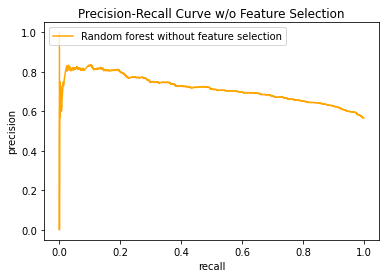

In [12]:
from matplotlib import pyplot as plt
plt.plot(recall_best,precision_best,color = 'orange', label="Random forest without feature selection")

plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc = 2)
plt.title('Precision-Recall Curve w/o Feature Selection')

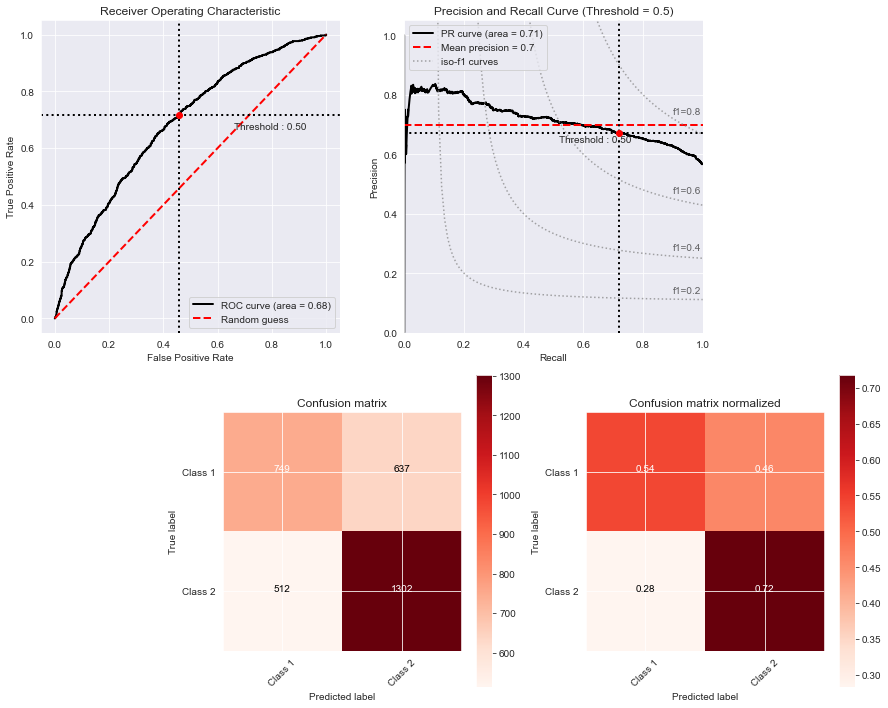

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 1       0.59      0.54      0.57      1386
     Class 2       0.67      0.72      0.69      1814

    accuracy                           0.64      3200
   macro avg       0.63      0.63      0.63      3200
weighted avg       0.64      0.64      0.64      3200



In [13]:
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(y_val,y_pred_proba_best, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()

## With Feature Selection

In [14]:
X_train_fs = train_data[embeded_rf_feature]
X_val_fs = val_data[embeded_rf_feature]

In [15]:
best = RandomForestClassifier(random_state=1211, oob_score=True, max_depth=10, n_estimators=100, class_weight='balanced_subsample')
best.fit(X_train_fs,y_train)

y_pred_best = best.predict(X_val_fs)
y_pred_proba_best = best.predict_proba(X_val_fs)[::,1]
precision_best, recall_best, thresholds_best = precision_recall_curve(y_val, y_pred_proba_best)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_best)

print(classification_report(y_val, y_pred_best))
print('F1 score:', f1_score(y_val,y_pred_best))
print('Precision:', precision_score(y_val,y_pred_best))
print('Recall:', recall_score(y_val,y_pred_best))
print('Accuracy:', accuracy_score(y_val,y_pred_best))

              precision    recall  f1-score   support

         0.0       0.53      0.62      0.58      1386
         1.0       0.67      0.58      0.62      1814

    accuracy                           0.60      3200
   macro avg       0.60      0.60      0.60      3200
weighted avg       0.61      0.60      0.60      3200

F1 score: 0.6246688254342068
Precision: 0.6702463676563487
Recall: 0.5848952590959207
Accuracy: 0.6015625


In [16]:
rffs_f1 = f1_score(y_val,y_pred_best)
rffs_precision = precision_score(y_val,y_pred_best)
rffs_recall = recall_score(y_val,y_pred_best)
rffs_acc = accuracy_score(y_val,y_pred_best)

Text(0.5, 1.0, 'Precision-Recall Curve For Baseline w/ Feature Selection')

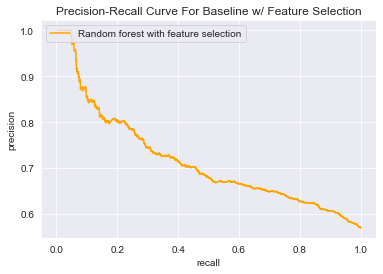

In [17]:
plt.plot(recall_best,precision_best,color = 'orange', label="Random forest with feature selection")

plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc = 2)
plt.title('Precision-Recall Curve For Baseline w/ Feature Selection')

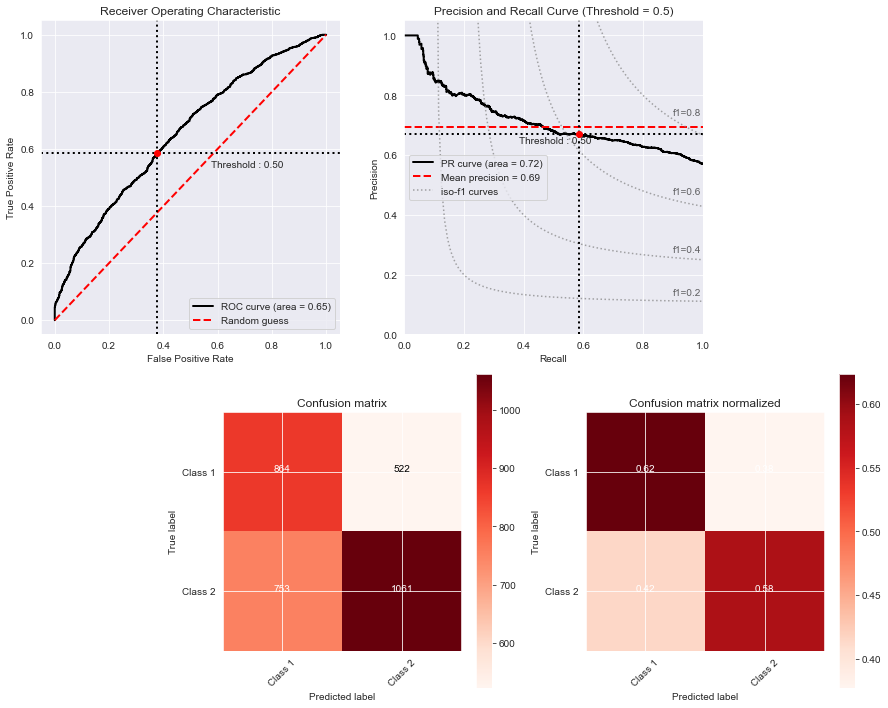

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 1       0.53      0.62      0.58      1386
     Class 2       0.67      0.58      0.62      1814

    accuracy                           0.60      3200
   macro avg       0.60      0.60      0.60      3200
weighted avg       0.61      0.60      0.60      3200



In [18]:
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(y_val, y_pred_proba_best, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()

# XG Boost

## Without feature selection

In [19]:
best = XGBClassifier(random_state=1211, max_depth=10, n_estimators=100)
best.fit(X_train,y_train)

y_pred_best = best.predict(X_val)
y_pred_proba_best = best.predict_proba(X_val)[::,1]
precision_best, recall_best, thresholds_best = precision_recall_curve(y_val, y_pred_proba_best)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_best)

print(classification_report(y_val, y_pred_best))
print('F1 score:', f1_score(y_val,y_pred_best))
print('Precision:', precision_score(y_val,y_pred_best))
print('Recall:', recall_score(y_val,y_pred_best))
print('Accuracy:', accuracy_score(y_val,y_pred_best))

[22:18:12] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.59      0.49      0.54      1386
         1.0       0.66      0.75      0.70      1814

    accuracy                           0.63      3200
   macro avg       0.62      0.62      0.62      3200
weighted avg       0.63      0.63      0.63      3200

F1 score: 0.6977823620422899
Precision: 0.6555232558139535
Recall: 0.7458654906284454
Accuracy: 0.63375


In [20]:
xgbwfs_f1 = f1_score(y_val,y_pred_best)
xgbwfs_precision = precision_score(y_val,y_pred_best)
xgbwfs_recall = recall_score(y_val,y_pred_best)
xgbwfs_acc = accuracy_score(y_val,y_pred_best)

Text(0.5, 1.0, 'Precision-Recall Curve w/o Feature Selection')

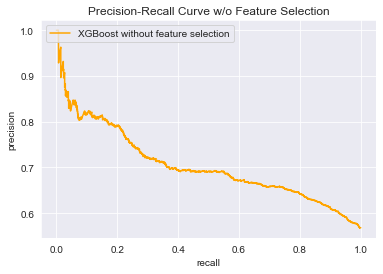

In [21]:
from matplotlib import pyplot as plt
plt.plot(recall_best,precision_best,color = 'orange', label="XGBoost without feature selection")

plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc = 2)
plt.title('Precision-Recall Curve w/o Feature Selection')

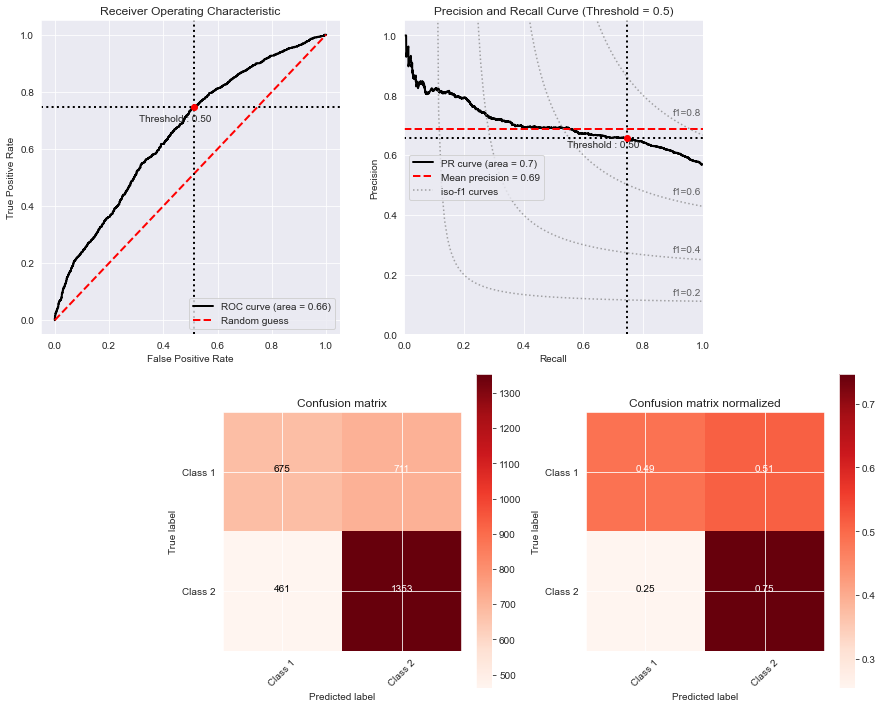

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 1       0.59      0.49      0.54      1386
     Class 2       0.66      0.75      0.70      1814

    accuracy                           0.63      3200
   macro avg       0.62      0.62      0.62      3200
weighted avg       0.63      0.63      0.63      3200



In [22]:
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(y_val,y_pred_proba_best, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()

## With feature selection

In [23]:
X_train_xgb = train_data[embeded_xgb_feature]
X_val_xgb = val_data[embeded_xgb_feature]

In [24]:
best = XGBClassifier(random_state=1211, max_depth=10, n_estimators=150)
best.fit(X_train_xgb,y_train)

y_pred_best = best.predict(X_val_xgb)
y_pred_proba_best = best.predict_proba(X_val_xgb)[::,1]
precision_best, recall_best, thresholds_best = precision_recall_curve(y_val, y_pred_proba_best)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba_best)

print(classification_report(y_val, y_pred_best))
print('F1 score:', f1_score(y_val,y_pred_best))
print('Precision:', precision_score(y_val,y_pred_best))
print('Recall:', recall_score(y_val,y_pred_best))
print('Accuracy:', accuracy_score(y_val,y_pred_best))

[22:18:14] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


D:\Anaconda\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


              precision    recall  f1-score   support

         0.0       0.58      0.44      0.50      1386
         1.0       0.64      0.76      0.69      1814

    accuracy                           0.62      3200
   macro avg       0.61      0.60      0.60      3200
weighted avg       0.61      0.62      0.61      3200

F1 score: 0.6930643127364439
Precision: 0.6387726638772664
Recall: 0.7574421168687983
Accuracy: 0.6196875


In [25]:
xgbfs_f1 = f1_score(y_val,y_pred_best)
xgbfs_precision = precision_score(y_val,y_pred_best)
xgbfs_recall = recall_score(y_val,y_pred_best)
xgbfs_acc = accuracy_score(y_val,y_pred_best)

Text(0.5, 1.0, 'Precision-Recall Curve For Baseline w/ Feature Selection')

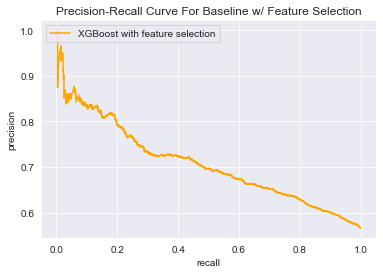

In [26]:
plt.plot(recall_best,precision_best,color = 'orange', label="XGBoost with feature selection")

plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc = 2)
plt.title('Precision-Recall Curve For Baseline w/ Feature Selection')

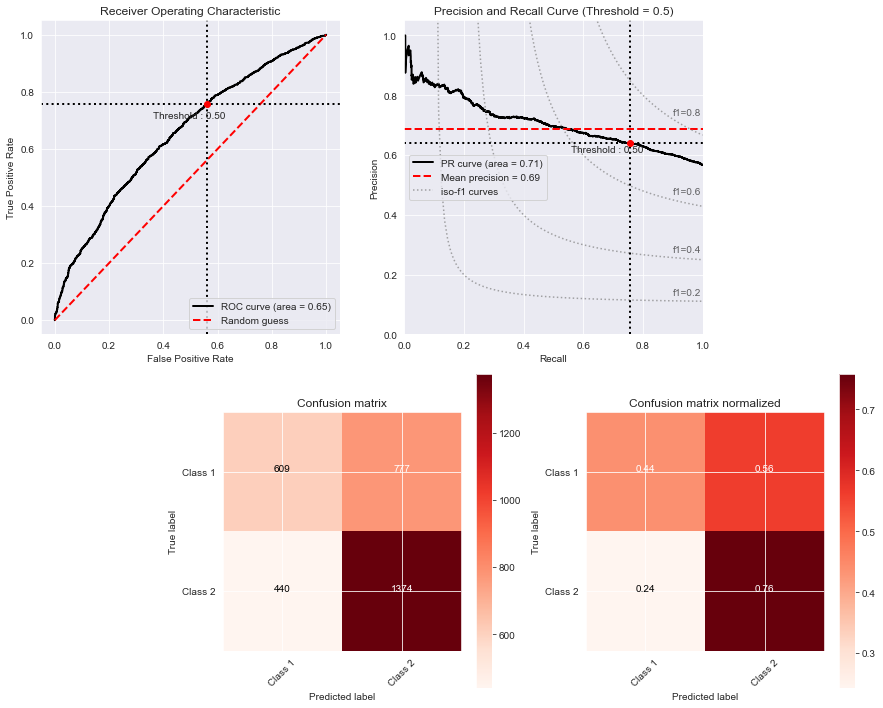

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 1       0.58      0.44      0.50      1386
     Class 2       0.64      0.76      0.69      1814

    accuracy                           0.62      3200
   macro avg       0.61      0.60      0.60      3200
weighted avg       0.61      0.62      0.61      3200



In [27]:
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(y_val, y_pred_proba_best, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()

# Deep Learning

In [28]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
import tensorflow as tf

In [92]:
model = Sequential()
model.add(Dense(80, input_dim=38, activation='relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(40, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(20, activation = 'relu', kernel_initializer='he_normal'))
model.add(Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])

In [95]:
model.fit(X_raw, y_raw, epochs=100, batch_size = 50, 
          verbose=1, callbacks = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3))

Epoch 1/100
411/411 [==============================] - 0s 659us/step - loss: 0.5794 - accuracy: 0.6777
Epoch 2/100
411/411 [==============================] - 0s 660us/step - loss: 0.5778 - accuracy: 0.6747
Epoch 3/100
411/411 [==============================] - 0s 652us/step - loss: 0.5784 - accuracy: 0.6818
Epoch 4/100
411/411 [==============================] - 0s 655us/step - loss: 0.5761 - accuracy: 0.6784
Epoch 5/100
411/411 [==============================] - 0s 650us/step - loss: 0.5793 - accuracy: 0.6772
Epoch 6/100
411/411 [==============================] - 0s 655us/step - loss: 0.5735 - accuracy: 0.6816
Epoch 7/100
411/411 [==============================] - 0s 689us/step - loss: 0.5732 - accuracy: 0.6808
Epoch 8/100
411/411 [==============================] - 0s 757us/step - loss: 0.5745 - accuracy: 0.6828
Epoch 9/100
411/411 [==============================] - 0s 672us/step - loss: 0.5717 - accuracy: 0.6845
Epoch 10/100
411/411 [==============================] - 0s 679us/step - l

In [96]:
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)
precision, recall, thresholds = precision_recall_curve(y_val, y_pred_proba)
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
rounded = [round(x[0]) for x in y_pred]
y_pred = rounded

print(classification_report(y_val, y_pred))
print('F1 score:', f1_score(y_val,y_pred))
print('Precision:', precision_score(y_val,y_pred))
print('Recall:', recall_score(y_val,y_pred))
print('Accuracy:', accuracy_score(y_val,y_pred))

              precision    recall  f1-score   support

         0.0       0.66      0.50      0.57      1386
         1.0       0.68      0.80      0.74      1814

    accuracy                           0.67      3200
   macro avg       0.67      0.65      0.65      3200
weighted avg       0.67      0.67      0.66      3200

F1 score: 0.7358062074186222
Precision: 0.6784550953932061
Recall: 0.8037486218302095
Accuracy: 0.6728125


In [32]:
nn_f1 = f1_score(y_val,y_pred)
nn_precision = precision_score(y_val,y_pred)
nn_recall = recall_score(y_val,y_pred)
nn_acc = accuracy_score(y_val,y_pred)

Text(0.5, 1.0, 'Precision-Recall Curve For Deep Neural Network')

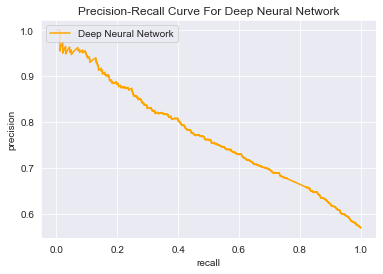

In [33]:
plt.plot(recall,precision,color = 'orange', label="Deep Neural Network")
plt.xlabel('recall')
plt.ylabel('precision')
plt.legend(loc = 2)
plt.title('Precision-Recall Curve For Deep Neural Network')

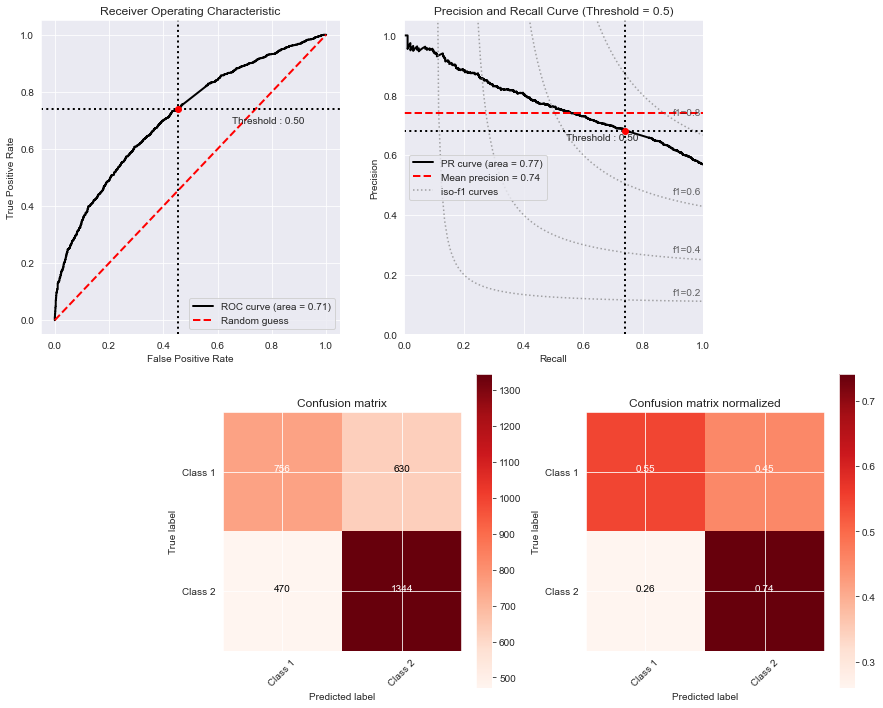

                   ________________________
                  |  Classification Report |
                   ‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾‾
              precision    recall  f1-score   support

     Class 1       0.62      0.55      0.58      1386
     Class 2       0.68      0.74      0.71      1814

    accuracy                           0.66      3200
   macro avg       0.65      0.64      0.64      3200
weighted avg       0.65      0.66      0.65      3200



In [34]:
from plot_metric.functions import BinaryClassification
bc = BinaryClassification(y_val, y_pred_proba, labels=["Class 1", "Class 2"])

# Figures
plt.figure(figsize=(15,10))
plt.subplot2grid(shape=(2,6), loc=(0,0), colspan=2)
bc.plot_roc_curve()
plt.subplot2grid((2,6), (0,2), colspan=2)
bc.plot_precision_recall_curve()
plt.subplot2grid((2,6), (1,1), colspan=2)
bc.plot_confusion_matrix()
plt.subplot2grid((2,6), (1,3), colspan=2)
bc.plot_confusion_matrix(normalize=True)
plt.show()
bc.print_report()

# Model Comparision

In [35]:
data = [['Random Forest Classifier (without feature selection)',rfwfs_f1,rfwfs_precision,rfwfs_recall,rfwfs_acc],
        ['Random Forest Classifier (with feature selection)',rffs_f1,rffs_precision,rffs_recall,rffs_acc],
        ['XGBoost Classifier (without feature selection)',xgbwfs_f1,xgbwfs_precision,xgbwfs_recall,xgbwfs_acc],
        ['XGBoost Classifier (with feature selection)',xgbfs_f1,xgbfs_precision,xgbfs_recall,xgbfs_acc],
        ['Deep Neural Network',nn_f1,nn_precision,nn_recall,nn_acc]
       ]

In [36]:
models = pd.DataFrame(data,columns=['Model','F1 Score','Precision','Recall','Accuracy'])

In [37]:
models

,Model,F1 Score,Precision,Recall,Accuracy
0,Random Forest Classifier (without feature sele...,0.693845,0.671480,0.717751,0.640938
1,Random Forest Classifier (with feature selection),0.624669,0.670246,0.584895,0.601562
2,XGBoost Classifier (without feature selection),0.697782,0.655523,0.745865,0.633750
3,XGBoost Classifier (with feature selection),0.693064,0.638773,0.757442,0.619687
4,Deep Neural Network,0.709609,0.680851,0.740904,0.656250


In [97]:
best_model = models.iloc[max(models.iloc[:,1:].idxmax())][0]
best_model

'Deep Neural Network'

# Testing

In [38]:
features = [[88,96,37.28,141,111,91,25,36,-3,19,0.4,7.37,35,93,17,33,219,6.9,
             116,0.6,1,197,1.1,2.3,2.6,4,0.,0.8,25.3,8.4,26.1,4.,309,71,56.46,0,-90.51,22]]
features = norm_x.transform(features)
testing = model.predict(features)

In [39]:
rounded = [round(x[0]) for x in testing]
testing = rounded
testing

[1]